In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
#df.head()
#df.shape
#df.info()
#df.describe()

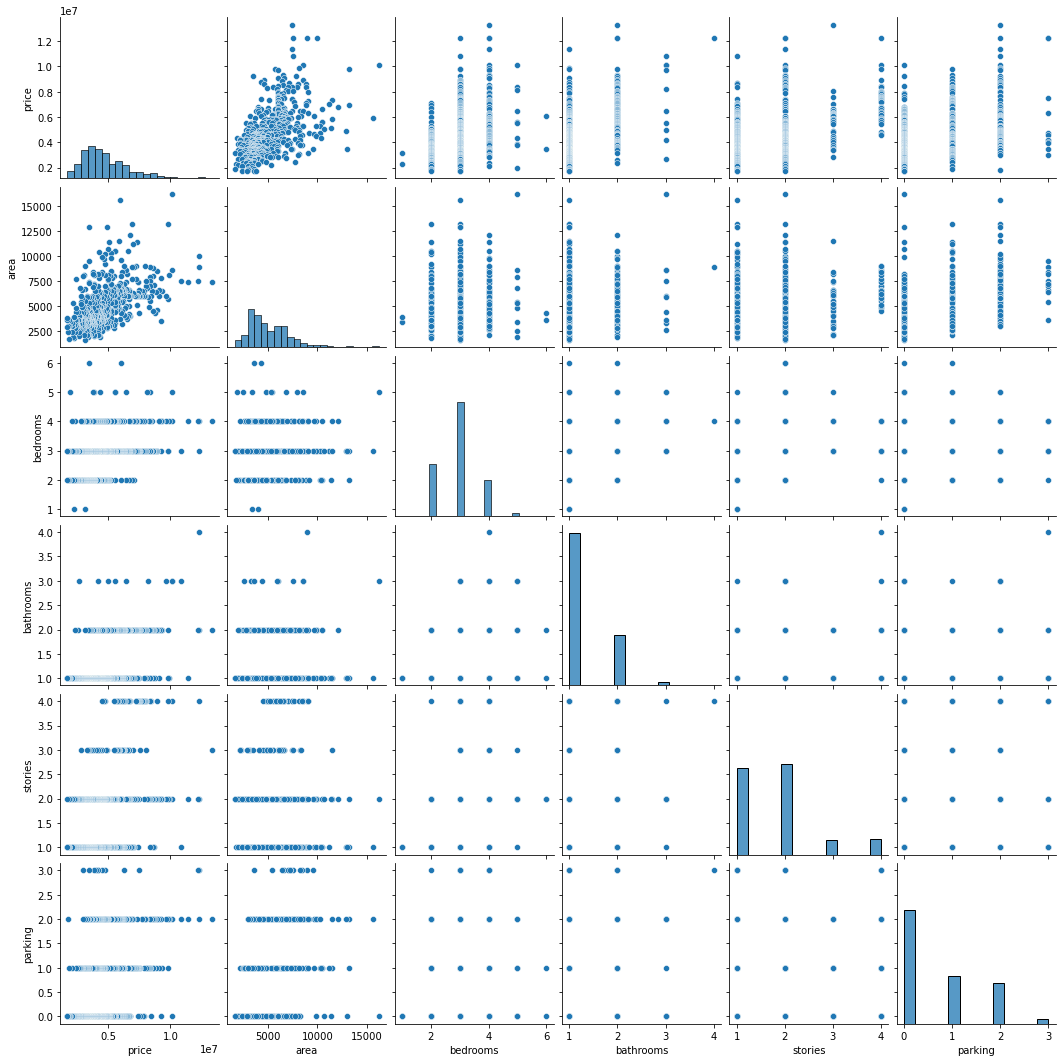

In [4]:
sns.pairplot(df)
plt.show()

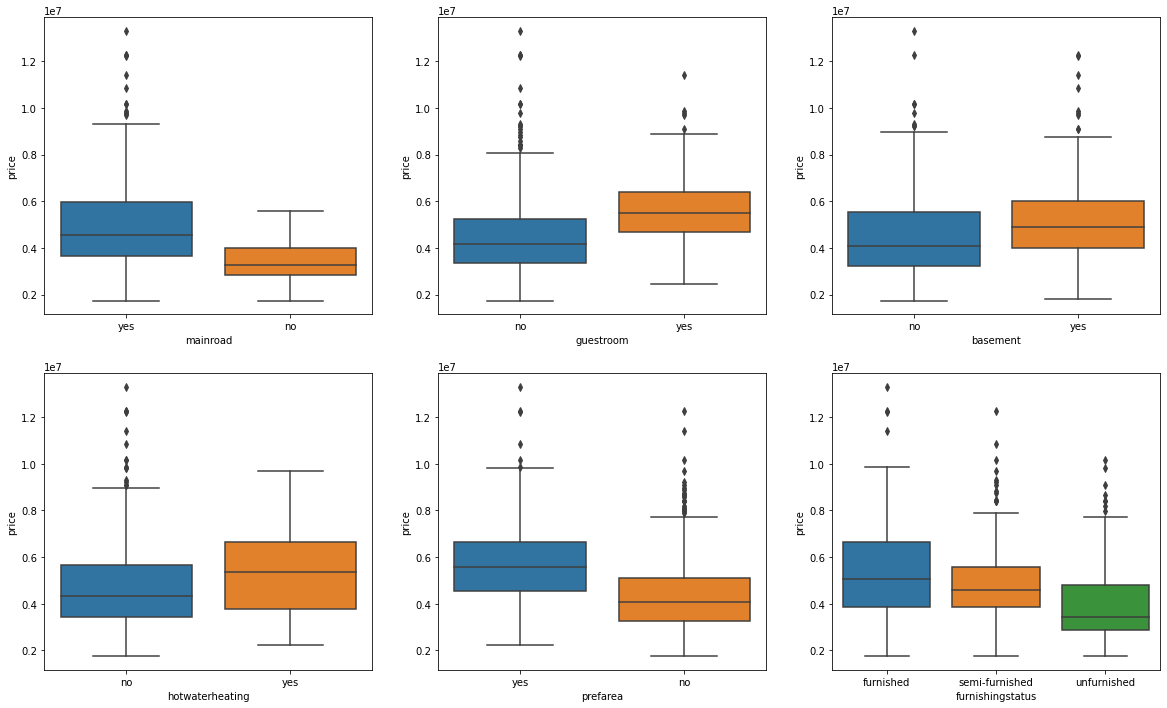

In [5]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x="mainroad", y="price", data=df)
plt.subplot(2,3,2)
sns.boxplot(x="guestroom", y="price", data=df)
plt.subplot(2,3,3)
sns.boxplot(x="basement", y="price", data=df)

plt.subplot(2,3,4)
sns.boxplot(x="hotwaterheating", y="price", data=df)

plt.subplot(2,3,5)
sns.boxplot(x="prefarea", y="price", data=df)
plt.subplot(2,3,6)
sns.boxplot(x="furnishingstatus", y="price", data=df)
plt.show()

In [6]:
#df.head()
bool_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
df[bool_cols]=df[bool_cols].apply(lambda x : x.map({"yes" :1, "no":0}))

In [7]:
#df.head()#furnishingstatus
status = pd.get_dummies(df["furnishingstatus"], drop_first=True)

In [8]:
#df.head()
#status.head()
df=pd.concat([df, status], axis=1)

In [9]:
df.drop("furnishingstatus", axis=1, inplace=True)

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [11]:
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
df_train,df_test=train_test_split(df, train_size=0.7, random_state=100)

In [27]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
minMaxScaler = MinMaxScaler()
nums_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[nums_vars]=minMaxScaler.fit_transform(df_train[nums_vars])

In [30]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


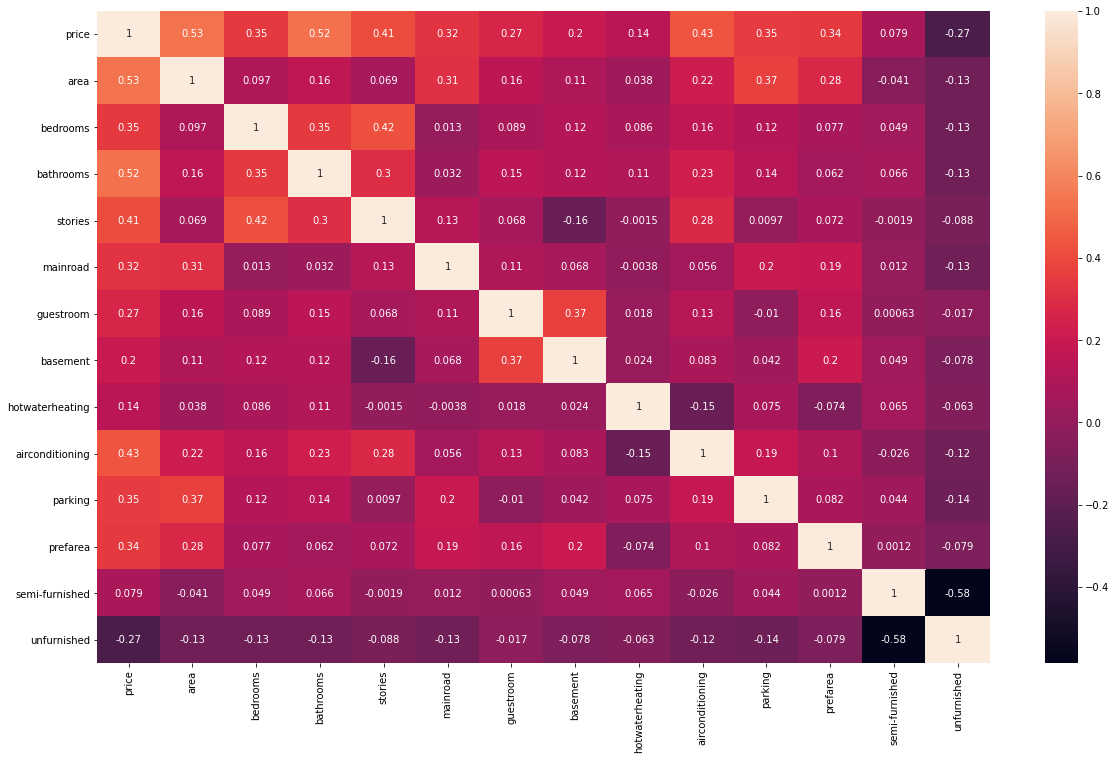

In [31]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [32]:

y_train = df_train.pop("price")
X_train =df_train

In [38]:
import statsmodels
import statsmodels.api as sm

In [42]:
#first we wil consider only one variable that is area
X_train_sm = sm.add_constant(df_train["area"])
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.params)
lr.summary()

const    0.126894
area     0.462192
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           3.15e-29
Time:                        10:12:39   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#first we wil consider only one variable that is area
X_train_sm = sm.add_constant(df_train[["area", "bathrooms"]])
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.params)
lr.summary()

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           2.51e-54
Time:                        10:13:51   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#first we wil consider only one variable that is area
X_train_sm = sm.add_constant(df_train[["area", "bathrooms", "bedrooms"]])
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.params)
lr.summary()

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           3.12e-57
Time:                        10:14:23   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# til now we saw the forward approach, we strted adding more variable to our model.
# now lets go backward approach, we wll add all the variables first, 
# 1. we will look at the p-values(significance) and we will look at the VIF (variance inflation ffactor) and we reduce the variables
# first preference we give it to the p-value . Becuase, once we remove some variable, we will actually dcrease the VIF of other param.
#VIF = 1/(1-R(i)^2)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
X_train = df_train
X_train_sm=sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
#print(lr.params)
print(lr.summary())
vif=pd.DataFrame()
vif["Feature"]=X_train.columns
#print(df_train.columns.size)
vif["Values"]=[round(variance_inflation_factor(X_train.values, x),2) for x in range(X_train.columns.size)]
vif.sort_values(by="Values", inplace=True, ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           8.83e-83
Time:                        10:49:07   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [83]:
X_train = df_train.drop("semi-furnished", axis=1)
X_train_sm=sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
#print(lr.params)
print(lr.summary())
vif=pd.DataFrame()
vif["Feature"]=X_train.columns
#print(df_train.columns.size)
vif["Values"]=[round(variance_inflation_factor(X_train.values, x),2) for x in range(X_train.columns.size)]
vif.sort_values(by="Values", inplace=True, ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.07e-83
Time:                        10:49:14   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [84]:
X_train = df_train.drop(["semi-furnished","bedrooms"], axis=1)
X_train_sm=sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
#print(lr.params)
print(lr.summary())
vif=pd.DataFrame()
vif["Feature"]=X_train.columns
#print(df_train.columns.size)
vif["Values"]=[round(variance_inflation_factor(X_train.values, x),2) for x in range(X_train.columns.size)]
vif.sort_values(by="Values", inplace=True, ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           2.73e-84
Time:                        10:49:40   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [87]:
nums_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_test[nums_vars]=minMaxScaler.transform(df_test[nums_vars])

In [89]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
y_test=df_test.pop("price")
X_test=df_test


In [97]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.drop(["semi-furnished","bedrooms"], inplace=True, axis=1)
y_test_pred = lr.predict(X_test_sm)

In [98]:
res = y_test - y_test_pred

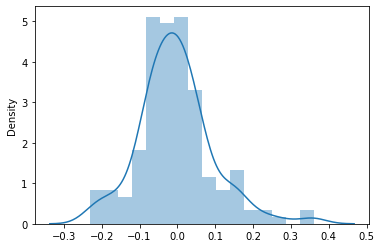

In [101]:
sns.distplot(res)
plt.show()

In [102]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.6713505684480789